# Medical Bot

## Overview
This Jupyter Notebook project aims to demonstrate conversational retrieval using a language model. It allows users to ask questions and retrieve relevant answers from a knowledge base using natural language queries.

## Technologies Used
- Python
- Jupyter Notebook
- PyTorch
- Transformers library

## Setup Instructions
1. Clone the project repository.
2. Install the required dependencies using `pip install -r requirements.txt`.
3. Download the pre-trained language model and necessary data files.
4. Open the Jupyter Notebook file in your preferred environment.

## Usage
1. Run the code cells to initialize the conversational retrieval chain.
2. Input your questions in the designated cells.
3. Execute the cells to retrieve answers based on the provided queries.
4. Follow the instructions in the notebook to interact with the conversational system.

## Example Queries
- Query 1: "How to cure diabetes?"
- Query 2: "AIDS prevention"

## Conclusion
This Jupyter Notebook project showcases the capabilities of conversational retrieval using a language model. By providing natural language queries, users can retrieve relevant information from the knowledge base.

## Future enhancements
improving the model's performance and integrating with external APIs for real-time data retrieval.


# Install Required Python Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
packages = [
    "langchain",
    "langchain_community",
    "langchain-huggingface",
    "sentence_transformers",
    "pypdf",
    "faiss-cpu",
    "bitsandbytes",
    "transformers",
    "accelerate",
    "scikit-learn",
    "gradio",
    "typer==0.10.0"
]

for pkg in packages:
    print(f" Installing: {pkg}")
    !pip install -qU {pkg}

print("All packages installed successfully.")

 Installing: langchain
 Installing: langchain_community


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sigstore 3.6.1 requires pyasn1~=0.6, but you have pyasn1 0.4.7 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.3 which is incompatible.


 Installing: langchain-huggingface
 Installing: sentence_transformers
 Installing: pypdf
 Installing: faiss-cpu
 Installing: bitsandbytes
 Installing: transformers
 Installing: accelerate
 Installing: scikit-learn
 Installing: gradio
 Installing: typer==0.10.0
All packages installed successfully.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.27.0 requires typer<1.0,>=0.12; sys_platform != "emscripten", but you have typer 0.10.0 which is incompatible.


# Checking GPU availability
## CUDA (Compute Unified Device Architecture) is a parallel computing platform and programming model developed by NVIDIA for their graphics processing units (GPUs)

In [2]:
import torch

cuda_available = torch.cuda.is_available()
integrated_gpu_name = torch.cuda.get_device_name(0) if cuda_available else None

print("CUDA available:", cuda_available)
print("Integrated GPU name:", integrated_gpu_name)

CUDA available: True
Integrated GPU name: NVIDIA GeForce RTX 2080 Ti


In [3]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

2.2.0+cu118
0.17.0+cu118



### Loading PDF Document
- We start by loading a PDF document using the `PyPDFLoader` from `langchain.document_loaders`.

### Checking Document Loading
- We then check if any documents were successfully loaded. If the length of the `documents` list is greater than 0, it indicates that at least one document was loaded successfully, and "yes" is printed; otherwise, "no" is printed.

### Splitting Document Text
- After loading the document, we import `RecursiveCharacterTextSplitter` from `langchain.text_splitter` to split the text.
- We create a `text_splitter` object with parameters specifying the chunk size and overlap.
- The text of all documents is split into smaller chunks using the `split_documents()` method of the `text_splitter` object.

### Printing Split Document Information
- Finally, we print the number of chunks the document text has been split into.

This code demonstrates loading a PDF document, checking if it was loaded successfully, and then splitting its text into smaller chunks.

In [4]:
import requests

url = "https://github.com/EchoSingh/FastMedicalBot/raw/main/Medical_Book.pdf"
response = requests.get(url)

with open("Medical_Book.pdf", "wb") as f:
    f.write(response.content)

In [5]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("Medical_Book.pdf")
documents = loader.load()

if len(documents) > 0:
    print("yes")
else:
    print("no")

from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
all_splits = text_splitter.split_documents(documents)

print("Document text has been split into", len(all_splits), "chunks.")

yes
Document text has been split into 3248 chunks.


## Use the embedding model and vectorstore to store embeddings

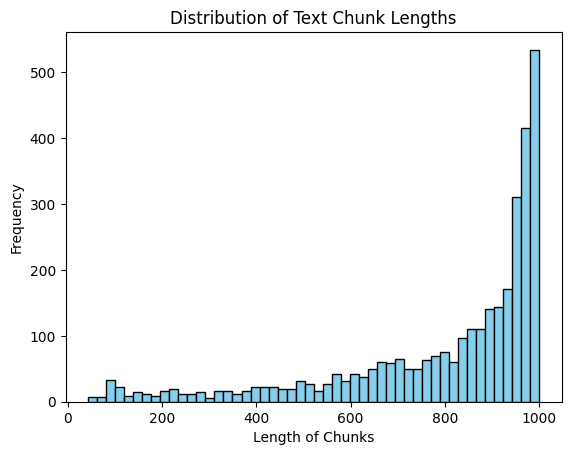

In [11]:
import matplotlib.pyplot as plt
chunk_lengths = [len(chunk.page_content) for chunk in all_splits]

plt.hist(chunk_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Chunk Lengths')
plt.xlabel('Length of Chunks')
plt.ylabel('Frequency')
plt.show()

Top words by frequency: [('may', np.int64(2736)), ('blood', np.int64(1938)), ('medicine', np.int64(1206)), ('drugs', np.int64(1186)), ('also', np.int64(1131)), ('disease', np.int64(1086)), ('patients', np.int64(1060)), ('treatment', np.int64(1039)), ('used', np.int64(1017)), ('symptoms', np.int64(929)), ('body', np.int64(749)), ('cause', np.int64(734)), ('medical', np.int64(686)), ('skin', np.int64(683)), ('cells', np.int64(671)), ('encyclopedia', np.int64(660)), ('effects', np.int64(655)), ('gale', np.int64(652)), ('page', np.int64(648)), ('heart', np.int64(636))]


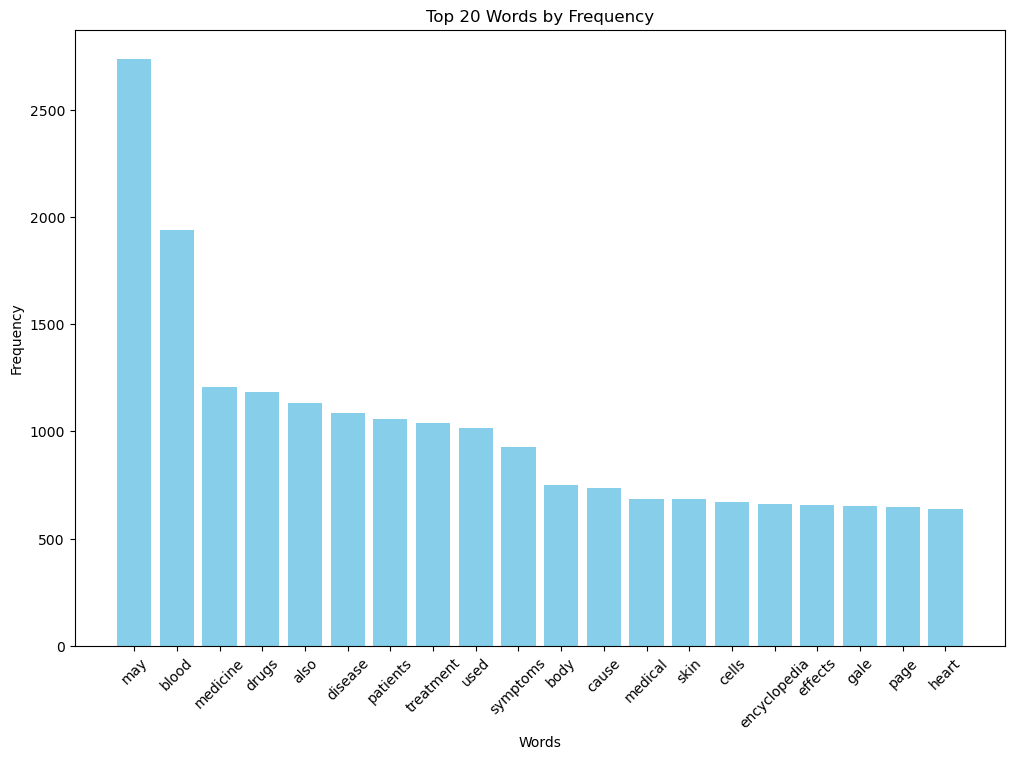

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords

document_texts = [chunk.page_content for chunk in all_splits]
def preprocess_text(text):
    # 去除特殊符号和标点符号
    text = re.sub(r'[^\w\s]', '', text)
    # 转为小写
    text = text.lower()
    return text
# 去除停用词
processed = [preprocess_text(text) for text in document_texts]
stop_words = list(stopwords.words('english'))

# 统计词频
def get_top_n_words(doc, n=None):
    vec = CountVectorizer(stop_words=list(stop_words)).fit(doc)
    bag_of_words = vec.transform(doc)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_words = get_top_n_words(processed, n=20)
print("Top words by frequency:", top_words)
words = [word for word, freq in top_words]
frequencies = [freq for word, freq in top_words]

# 绘制柱状图
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')
plt.title('Top 20 Words by Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

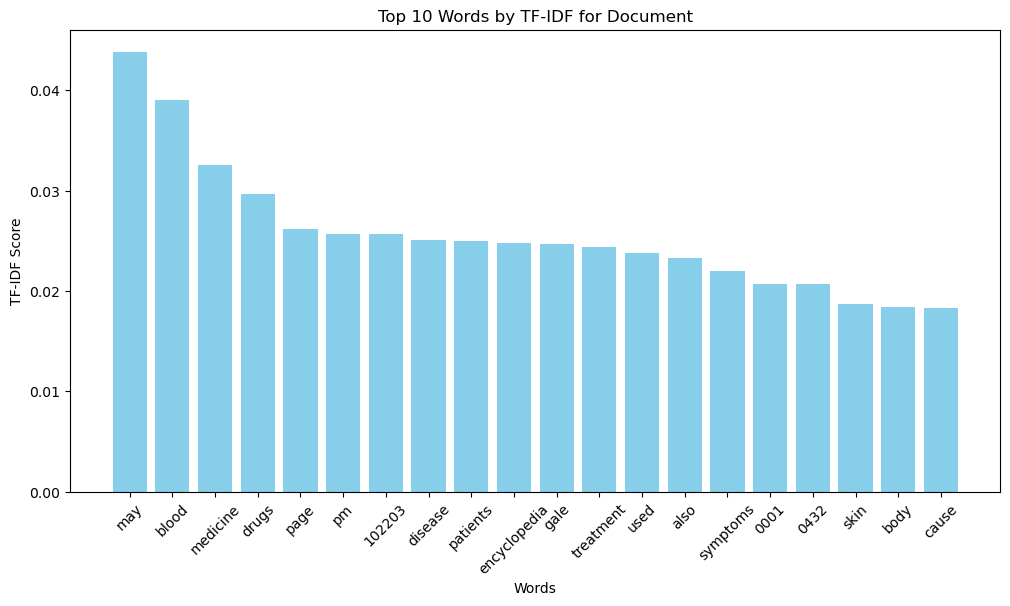

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words=list(stop_words), max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(processed)

# 获取特征名称
feature_names = tfidf_vectorizer.get_feature_names_out()

# 转换为DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

mean_tfidf = df_tfidf.mean(axis=0)
sorted_mean_tfidf = mean_tfidf.sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.bar(sorted_mean_tfidf.index, sorted_mean_tfidf.values, color='skyblue')
plt.title(f'Top 20 Words by TF-IDF for Document')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()


In [30]:
from sklearn.decomposition import LatentDirichletAllocation

tfidf_vectorizer = TfidfVectorizer(stop_words=list(stop_words), max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(processed)

lda = LatentDirichletAllocation(n_components=20, random_state=42)
lda.fit(tfidf_matrix)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, tfidf_vectorizer.get_feature_names_out(), 5)

Topic 0:
histamine cells hemoglobin count volume
Topic 1:
permissiongem reproduced photo 102203 pm
Topic 2:
marrow bone anemia atrial transplant
Topic 3:
fetus birth defects baby mother
Topic 4:
symptoms may disease infection causes
Topic 5:
effects drugs taking side physician
Topic 6:
albinism atherosclerosis coronary arteries artery
Topic 7:
adrenal gland amebiasis hormones glands
Topic 8:
antibodies serum antibody antigen training
Topic 9:
ed al et books 1997
Topic 10:
nausea headache dizziness diarrhea hydrochloride
Topic 11:
2001 anthrax aneurysm aortic toxin
Topic 12:
acoustic aphasia brain language hearing
Topic 13:
102203 pm page gale encyclopedia
Topic 14:
drugs may used treatment drug
Topic 15:
tumors acne brain cells malignant
Topic 16:
blood test may procedure patients
Topic 17:
category fetal studies animal human
Topic 18:
american national 800 medical organizations
Topic 19:
lining clot oral surgeon uses


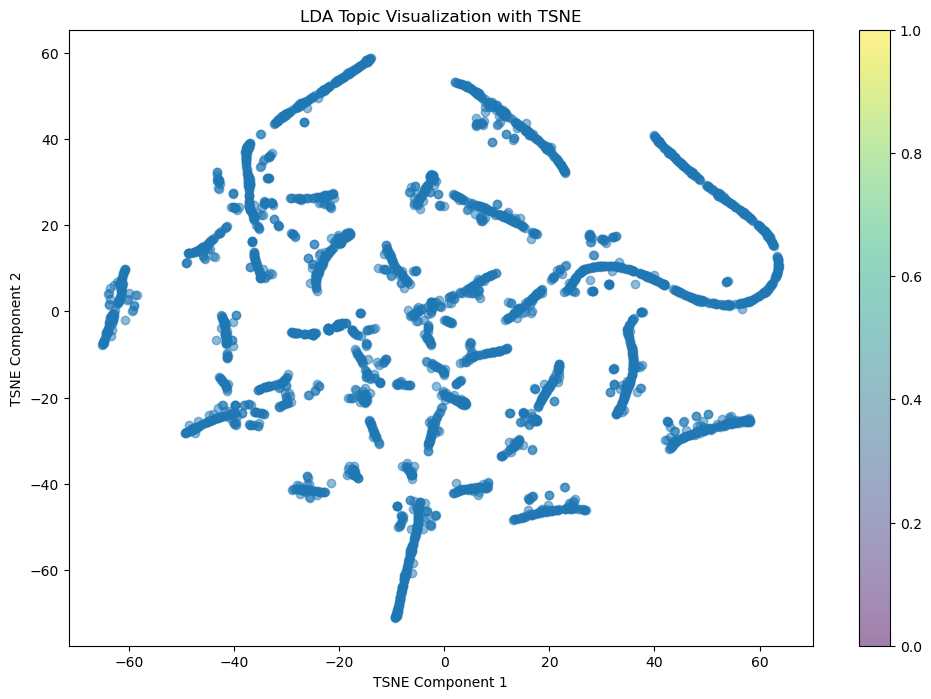

In [29]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne_model = TSNE(n_components=2, random_state=42)
tsne_lda = tsne_model.fit_transform(lda.transform(tfidf_matrix))

plt.figure(figsize=(12, 8))
plt.scatter(tsne_lda[:, 0], tsne_lda[:, 1], cmap='viridis', alpha=0.5)
plt.title('LDA Topic Visualization with TSNE')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.colorbar()
plt.show()

In [6]:
import os
import sys

sys.stderr = open(os.devnull, 'w')

from langchain.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings

model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {"device": "cuda"}  

embeddings = HuggingFaceEmbeddings(model_name=model_name, model_kwargs=model_kwargs,cache_folder='./')

vectorstore = FAISS.from_documents(all_splits, embeddings)

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


# Creating md function to display the result

In [7]:
from IPython.display import Markdown
def md(t):
  display(Markdown(t))

# Text Generation with Hugging Face Model

This code utilizes a pre-trained language model from the Hugging Face Transformers library to generate text based on given prompts.

## Model Selection
- We choose a pre-trained language model named "ruslanmv/Medical-Llama3-8B". This model is specifically trained for medical text data.

## Device Selection
- The code checks whether CUDA (NVIDIA GPU acceleration) is available on the system. If available, it uses CUDA for faster computations; otherwise, it falls back to CPU.

## Model Configuration
- We configure the model to use 4-bit quantization, a technique to reduce model size and improve inference speed while maintaining acceptable accuracy.
- The model is loaded with options such as enabling caching and trusting remote code.

## Text Generation Pipeline
- We set up a text generation pipeline using the Hugging Face `pipeline` function.
- This pipeline uses the configured model and tokenizer to generate text based on given prompts.
- Parameters such as maximum token length, temperature (controls randomness), and top-p (controls diversity) are set to customize text generation.

## Concluding
- The pipeline `llm` is ready for generating text based on input prompts.

This code leverages a pre-trained language model to generate medical text, with options for customizing text generation parameters.


In [8]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, pipeline
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.llms import HuggingFacePipeline

model_name = "ritvik77/Medical_Doctor_AI_LoRA-Mistral-7B-Instruct_FullModel"
device_map = 'auto'

# 4-bit quantization config
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
)

# Load model with quantization
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    trust_remote_code=True,
    use_cache=True,
    device_map=device_map,
    cache_dir="D:/Download/models"
)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token

# Create generation pipeline
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=150,
    temperature=0.7,
    top_p=0.9,
    do_sample=True
)

# Wrap with LangChain
llm = HuggingFacePipeline(pipeline=pipe)


# Conversational Retrieval Chain Setup


This code sets up a conversational retrieval chain, which leverages a language model for generating responses to given prompts within a conversational context.

## Prompt Template Definition
- A custom prompt template is defined to structure the input for the language model.
- The template includes variables such as "context", "question", and "chat_history" to provide necessary information for generating responses.
- This template serves as a guideline for formatting the input to the language model.

## Chain Initialization
- A `ConversationalRetrievalChain` is initialized using the `from_llm` method.
- The language model (`llm`) is provided as the core component for generating responses.
- Additionally, a retriever is specified for retrieving relevant documents or information based on the input.
- The option `return_source_documents=True` indicates that the retrieved source documents will also be returned along with the response.
- The `condense_question_prompt` parameter is set to the custom prompt template defined earlier.

## Chat History Initialization
- A `chat_history` list is initialized to store the conversation history.
- This history will be updated as the conversation progresses.

The setup is now complete, and the conversational retrieval chain is ready to generate responses based on input prompts within a conversational context, incorporating the provided chat history.


In [9]:
from langchain.chains import ConversationalRetrievalChain
from langchain.prompts import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.chains.llm import LLMChain


condense_question_prompt = PromptTemplate(
    input_variables=["question", "chat_history"],
    template="""
You are a helpful medical assistant. Given the following conversation and a follow-up question, rephrase the follow-up question to be a standalone question.

Chat History:
{chat_history}

Follow-up Question:
{question}

Standalone Question:"""
)


qa_prompt = PromptTemplate(
    input_variables=["context", "question"],
    template="""
Use the following context to answer the question.

Context:
{context}

Question:
{question}

Answer:
"""
)



#  Chains 

question_generator = LLMChain(
    llm=llm,
    prompt=condense_question_prompt
)


combine_docs_chain = load_qa_chain(
    llm=llm,
    chain_type="stuff",
    prompt=qa_prompt
)


chain = ConversationalRetrievalChain(
    retriever=vectorstore.as_retriever(),
    combine_docs_chain=combine_docs_chain,
    question_generator=question_generator,
    return_source_documents=True
)


## Asking Queries From our Medical Bot 🤗

In [10]:
chat_history = []

question = "Patient reports chest pain and dizziness. What’s the likely diagnosis?"
result = chain({"question": question, "chat_history": chat_history})

# Update chat history
chat_history.append((question, result["answer"]))

print("Answer:", result["answer"])


Answer: 
Use the following context to answer the question.

Context:
disease, stress ,caffeine , tobacco, alcohol, diet pills, and
decongestants in cough and cold medicines.
Symptoms of an arrhythmia include a fast heartbeat,
pounding or fluttering chest sensations, skipping a heart-beat, “flip-flops,” dizziness , faintness, shortness of
breath , and chest pains.
Diagnosis
Examination with a stethoscope, electrocardio-
grams, and electrophysiologic studies is used to diagnosearrhythmias. Sometimes arrhythmias can be identified bylistening to the patient’s heart through a stethoscope, but,since arrhythmias are not always present, they may notoccur during the physical exam.
An electrocardiogram (ECG) shows the heart’s
activity and may reveal a lack of oxygen from poor circu-lation ( ischemia ). Electrodes covered with conducting

• inhaling cold air (cold-induced asthma)
• exercise-induced asthma (in certain children, asthma is
caused simply by exercising)
• stress or a high level of anx

In [11]:
# Query 1
query = "How to cure diabetes?"
result = chain.invoke({"question": query, "chat_history": chat_history})
md(result['answer'])


Use the following context to answer the question.

Context:
disease, stress ,caffeine , tobacco, alcohol, diet pills, and
decongestants in cough and cold medicines.
Symptoms of an arrhythmia include a fast heartbeat,
pounding or fluttering chest sensations, skipping a heart-beat, “flip-flops,” dizziness , faintness, shortness of
breath , and chest pains.
Diagnosis
Examination with a stethoscope, electrocardio-
grams, and electrophysiologic studies is used to diagnosearrhythmias. Sometimes arrhythmias can be identified bylistening to the patient’s heart through a stethoscope, but,since arrhythmias are not always present, they may notoccur during the physical exam.
An electrocardiogram (ECG) shows the heart’s
activity and may reveal a lack of oxygen from poor circu-lation ( ischemia ). Electrodes covered with conducting

instance, the danger of aspirating stomach contents into
the lungs can be avoided by making sure a patient does noteat shortly before receiving general anesthesia. If a patientneeds oxygen therapy, as low a level as possible should begiven. Any form of lung infection, or infection anywherein the body that gets into the blood, must be treatedpromptly to avoid the lung injury that causes ARDS.
Resources
BOOKS
Smolley, Lawrence A., and Debra F. Bryse. Breathe Right
Now: A Comprehensive Guide to Understanding andTreating the Most Common Breathing Disorders. New
York: W. W. Norton & Co., 1998.
ORGANIZATIONS
National Heart, Lung and Blood Institute. P.O. Box 30105,
Bethesda, MD 20824-0105. (301) 251-1222. <http://www.nhlbi.nih.gov>.
National Respiratory Distress Syndrome Foundation. P.O. Box
723, Montgomeryville, PA 18936.
OTHER
“Pulmonary Medicine.” HealthWeb.com. 5 Jan. 1998. <http://
healthweb.org>.
David A. Cramer, MD
AFP test seeAlpha-fetoprotein test
African American health seeMinority

lar Conditions.” In The Essential Heart Book for Women.
New York: St. Martin’s Press, 1996.
Texas Heart Institute. “Arrhythmias.” In Texas Heart Institute
Heart Owner’s Handbook. New York: John Wiley & Sons,
1996.
ORGANIZATIONS
American Heart Association. 7320 Greenville Ave. Dallas, TX
75231. (214) 373-6300. <http://www.americanheart.org>.
National Heart, Lung and Blood Institute. PO Box 30105,
Bethesda, MD 20824-0105. (301) 251-1222. <http://www.nhlbi.nih.gov>.
Texas Heart Institute. Heart Information Service. PO Box 20345,
Houston, TX 77225-0345. <http://www.tmc.edu/thi>.
OTHER
“The Correction of Abnormal Heart Rhythms.” Health World
Online. 3 Mar. 1998 <http://www.health.net/library/books>.
“Implanted Defibrillators Save More Lives Than Drugs.” Mayo
Clinic Online. 26 Feb. 1998. 3 Mar. 1998 <http://www.
mayohealth.org>.
Lori De Milto
Arterial blood gas analysis seeBlood gas
analysis
Arterial embolism
Definition
An embolus is a blood clot, bit of tissue or tumor,

The Gale Encyclopedia of Medicine 2 is a medical ref-
erence product designed to inform and educate readersabout a wide variety of disorders, conditions, treatments,and diagnostic tests. The Gale Group believes the productto be comprehensive, but not necessarily definitive. It isintended to supplement, not replace, consultation with aphysician or other healthcare practitioner. While the GaleGroup has made substantial efforts to provide informationthat is accurate, comprehensive, and up-to-date, the GaleGroup makes no representations or warranties of anykind, including without limitation, warranties of mer-

Question:

You are a helpful medical assistant. Given the following conversation and a follow-up question, rephrase the follow-up question to be a standalone question.

Chat History:

Human: Patient reports chest pain and dizziness. What’s the likely diagnosis?
Assistant: 
Use the following context to answer the question.

Context:
disease, stress ,caffeine , tobacco, alcohol, diet pills, and
decongestants in cough and cold medicines.
Symptoms of an arrhythmia include a fast heartbeat,
pounding or fluttering chest sensations, skipping a heart-beat, “flip-flops,” dizziness , faintness, shortness of
breath , and chest pains.
Diagnosis
Examination with a stethoscope, electrocardio-
grams, and electrophysiologic studies is used to diagnosearrhythmias. Sometimes arrhythmias can be identified bylistening to the patient’s heart through a stethoscope, but,since arrhythmias are not always present, they may notoccur during the physical exam.
An electrocardiogram (ECG) shows the heart’s
activity and may reveal a lack of oxygen from poor circu-lation ( ischemia ). Electrodes covered with conducting

• inhaling cold air (cold-induced asthma)
• exercise-induced asthma (in certain children, asthma is
caused simply by exercising)
• stress or a high level of anxiety
Wheezing is often very obvious, but mild asthmatic
attacks may be confirmed when the physician listens tothe patient’s chest with a stethoscope. Besides wheezingand being short of breath, the patient may cough and
may report a feeling of “tightness” in the chest. Childrenmay have itching on their back or neck at the start of an

• Inflammation of the pancreas ( pancreatitis ), when
blood proteins, called enzymes, pass to the lungs andinjure lung cells.
• Severe burn injury.
• Injury of the brain, or bleeding into the brain, from any
cause may be a factor in ARDS for reasons that are notclear. Convulsions also may cause some cases.
Usually ARDS develops within one to two days of the
original illness or injury. The person begins to take rapidbut shallow breaths. The doctor who listens to the patient’schest with a stethoscope may hear “crackling” or wheez-
ingsounds. The low blood oxygen content may cause the
skin to appear mottled or even blue. As fluid continues tofill the breathing sacs, the patient may have great troublebreathing, take very rapid breaths, and gasp for air.
Diagnosis
A simple test using a device applied to the ear will
show whether the blood is carrying too little oxygen, andthis can be confirmed by analyzing blood taken from anartery. The chest x ray may be normal in the early stages,

using general anesthesia is at risk to develop atelectasis,since breathing is often shallow after surgery to avoidpain from the surgical incision. Any significant decreasein airflow to the alveoli contributes to pooling of secre-tions, which in turn can cause infection. Chest injuriescausing shallow breathing, including fractured ribs, cancause atelectasis. Common symptoms of atelectasisinclude shortness of breath and decreased chest wall
expansion. If atelectasis only afects a small area of thelung, symptoms are ususally minimal. If the conditionaffects a large area of the lung and develops quickly, theindividual may turn blue (cyanotic) or pale, have extremeshortness of breath, and feel a stabbing pain on theaffected side. Fever and increased heart rate may be pre-
sent if infection accompanies atelectasis.
Diagnosis
To diagnose atelectasis, a doctor starts by recording
the patient’s symptoms and performing a thorough phys-
ical examination . When the doctor listens to the lungs

Question:
Patient reports chest pain and dizziness. What’s the likely diagnosis?

Answer:
The patient's symptoms of chest pain and dizziness could suggest a diagnosis of arrhythmia, given the context of the passage. Arrhythmias can cause a variety of symptoms, including fast heartbeat, pounding or fluttering chest sensations, skipping a heartbeat, dizziness, and shortness of breath. It is essential to perform appropriate diagnostic tests such as an electrocardiogram (ECG) and possibly further examination with a stethoscope to confirm the diagnosis.

Follow-up Question:
How to cure diabetes?

Standalone Question:
What are the common treatments for diabetes?

Answer:
The common treatments for diabetes include:

1. Diet and exercise: A balanced diet and regular exercise are essential for managing diabetes. A diet rich in fruits, vegetables, lean proteins, and whole grains can help control blood sugar levels. Regular exercise aids in maintaining a healthy weight, which is important for diabetes management.

2. Oral medications: A range of oral medications are available to help control blood sugar levels in people with diabetes. These medications include metformin, sulfonylureas, thiazolidinediones, and dipeptidyl peptidase-4 inhibitors.

3. Insulin therapy: In some cases, people with diabetes may need insulin therapy, either through

In [12]:
# Query 2
query = "what is frost bite ?"
result = chain.invoke({"question": query, "chat_history": chat_history})
md(result['answer'])


Use the following context to answer the question.

Context:
disease, stress ,caffeine , tobacco, alcohol, diet pills, and
decongestants in cough and cold medicines.
Symptoms of an arrhythmia include a fast heartbeat,
pounding or fluttering chest sensations, skipping a heart-beat, “flip-flops,” dizziness , faintness, shortness of
breath , and chest pains.
Diagnosis
Examination with a stethoscope, electrocardio-
grams, and electrophysiologic studies is used to diagnosearrhythmias. Sometimes arrhythmias can be identified bylistening to the patient’s heart through a stethoscope, but,since arrhythmias are not always present, they may notoccur during the physical exam.
An electrocardiogram (ECG) shows the heart’s
activity and may reveal a lack of oxygen from poor circu-lation ( ischemia ). Electrodes covered with conducting

instance, the danger of aspirating stomach contents into
the lungs can be avoided by making sure a patient does noteat shortly before receiving general anesthesia. If a patientneeds oxygen therapy, as low a level as possible should begiven. Any form of lung infection, or infection anywherein the body that gets into the blood, must be treatedpromptly to avoid the lung injury that causes ARDS.
Resources
BOOKS
Smolley, Lawrence A., and Debra F. Bryse. Breathe Right
Now: A Comprehensive Guide to Understanding andTreating the Most Common Breathing Disorders. New
York: W. W. Norton & Co., 1998.
ORGANIZATIONS
National Heart, Lung and Blood Institute. P.O. Box 30105,
Bethesda, MD 20824-0105. (301) 251-1222. <http://www.nhlbi.nih.gov>.
National Respiratory Distress Syndrome Foundation. P.O. Box
723, Montgomeryville, PA 18936.
OTHER
“Pulmonary Medicine.” HealthWeb.com. 5 Jan. 1998. <http://
healthweb.org>.
David A. Cramer, MD
AFP test seeAlpha-fetoprotein test
African American health seeMinority

lar Conditions.” In The Essential Heart Book for Women.
New York: St. Martin’s Press, 1996.
Texas Heart Institute. “Arrhythmias.” In Texas Heart Institute
Heart Owner’s Handbook. New York: John Wiley & Sons,
1996.
ORGANIZATIONS
American Heart Association. 7320 Greenville Ave. Dallas, TX
75231. (214) 373-6300. <http://www.americanheart.org>.
National Heart, Lung and Blood Institute. PO Box 30105,
Bethesda, MD 20824-0105. (301) 251-1222. <http://www.nhlbi.nih.gov>.
Texas Heart Institute. Heart Information Service. PO Box 20345,
Houston, TX 77225-0345. <http://www.tmc.edu/thi>.
OTHER
“The Correction of Abnormal Heart Rhythms.” Health World
Online. 3 Mar. 1998 <http://www.health.net/library/books>.
“Implanted Defibrillators Save More Lives Than Drugs.” Mayo
Clinic Online. 26 Feb. 1998. 3 Mar. 1998 <http://www.
mayohealth.org>.
Lori De Milto
Arterial blood gas analysis seeBlood gas
analysis
Arterial embolism
Definition
An embolus is a blood clot, bit of tissue or tumor,

The Gale Encyclopedia of Medicine 2 is a medical ref-
erence product designed to inform and educate readersabout a wide variety of disorders, conditions, treatments,and diagnostic tests. The Gale Group believes the productto be comprehensive, but not necessarily definitive. It isintended to supplement, not replace, consultation with aphysician or other healthcare practitioner. While the GaleGroup has made substantial efforts to provide informationthat is accurate, comprehensive, and up-to-date, the GaleGroup makes no representations or warranties of anykind, including without limitation, warranties of mer-

Question:

You are a helpful medical assistant. Given the following conversation and a follow-up question, rephrase the follow-up question to be a standalone question.

Chat History:

Human: Patient reports chest pain and dizziness. What’s the likely diagnosis?
Assistant: 
Use the following context to answer the question.

Context:
disease, stress ,caffeine , tobacco, alcohol, diet pills, and
decongestants in cough and cold medicines.
Symptoms of an arrhythmia include a fast heartbeat,
pounding or fluttering chest sensations, skipping a heart-beat, “flip-flops,” dizziness , faintness, shortness of
breath , and chest pains.
Diagnosis
Examination with a stethoscope, electrocardio-
grams, and electrophysiologic studies is used to diagnosearrhythmias. Sometimes arrhythmias can be identified bylistening to the patient’s heart through a stethoscope, but,since arrhythmias are not always present, they may notoccur during the physical exam.
An electrocardiogram (ECG) shows the heart’s
activity and may reveal a lack of oxygen from poor circu-lation ( ischemia ). Electrodes covered with conducting

• inhaling cold air (cold-induced asthma)
• exercise-induced asthma (in certain children, asthma is
caused simply by exercising)
• stress or a high level of anxiety
Wheezing is often very obvious, but mild asthmatic
attacks may be confirmed when the physician listens tothe patient’s chest with a stethoscope. Besides wheezingand being short of breath, the patient may cough and
may report a feeling of “tightness” in the chest. Childrenmay have itching on their back or neck at the start of an

• Inflammation of the pancreas ( pancreatitis ), when
blood proteins, called enzymes, pass to the lungs andinjure lung cells.
• Severe burn injury.
• Injury of the brain, or bleeding into the brain, from any
cause may be a factor in ARDS for reasons that are notclear. Convulsions also may cause some cases.
Usually ARDS develops within one to two days of the
original illness or injury. The person begins to take rapidbut shallow breaths. The doctor who listens to the patient’schest with a stethoscope may hear “crackling” or wheez-
ingsounds. The low blood oxygen content may cause the
skin to appear mottled or even blue. As fluid continues tofill the breathing sacs, the patient may have great troublebreathing, take very rapid breaths, and gasp for air.
Diagnosis
A simple test using a device applied to the ear will
show whether the blood is carrying too little oxygen, andthis can be confirmed by analyzing blood taken from anartery. The chest x ray may be normal in the early stages,

using general anesthesia is at risk to develop atelectasis,since breathing is often shallow after surgery to avoidpain from the surgical incision. Any significant decreasein airflow to the alveoli contributes to pooling of secre-tions, which in turn can cause infection. Chest injuriescausing shallow breathing, including fractured ribs, cancause atelectasis. Common symptoms of atelectasisinclude shortness of breath and decreased chest wall
expansion. If atelectasis only afects a small area of thelung, symptoms are ususally minimal. If the conditionaffects a large area of the lung and develops quickly, theindividual may turn blue (cyanotic) or pale, have extremeshortness of breath, and feel a stabbing pain on theaffected side. Fever and increased heart rate may be pre-
sent if infection accompanies atelectasis.
Diagnosis
To diagnose atelectasis, a doctor starts by recording
the patient’s symptoms and performing a thorough phys-
ical examination . When the doctor listens to the lungs

Question:
Patient reports chest pain and dizziness. What’s the likely diagnosis?

Answer:
The patient's symptoms of chest pain and dizziness could suggest a diagnosis of arrhythmia, given the context of the passage. Arrhythmias can cause a variety of symptoms, including fast heartbeat, pounding or fluttering chest sensations, skipping a heartbeat, dizziness, and shortness of breath. It is essential to perform appropriate diagnostic tests such as an electrocardiogram (ECG) and possibly further examination with a stethoscope to confirm the diagnosis.

Follow-up Question:
what is frost bite ?

Standalone Question:
What is frostbite?

Frostbite is a condition that occurs when skin or other body tissues freeze as a result of prolonged exposure to cold temperatures. Symptoms of frostbite include numbness, pain in the affected area, a white or pale appearance, and often a waxy feel to the skin. If left untreated, frostbite can lead to tissue damage and even gangrene in severe cases. It is crucial to rewarm the affected body part slowly and carefully to prevent further damage.

Answer:

Frostbite is a condition that occurs when skin or other body tissues freeze as a result of prolonged exposure to cold temperatures. Symptoms of frostbite include numbness, pain in the affected area, a white or pale appearance, and often a waxy feel to the skin. If left untreated, frostbite can lead to tissue damage and even gangrene in severe cases. It is crucial to rewarm the affected body part slowly and carefully to prevent further damage.

In [13]:
# Query 3.1
query = "AIDS prevention "
result1 = chain.invoke({"question": query, "chat_history": chat_history})
md(result1['answer'])


Use the following context to answer the question.

Context:
disease, stress ,caffeine , tobacco, alcohol, diet pills, and
decongestants in cough and cold medicines.
Symptoms of an arrhythmia include a fast heartbeat,
pounding or fluttering chest sensations, skipping a heart-beat, “flip-flops,” dizziness , faintness, shortness of
breath , and chest pains.
Diagnosis
Examination with a stethoscope, electrocardio-
grams, and electrophysiologic studies is used to diagnosearrhythmias. Sometimes arrhythmias can be identified bylistening to the patient’s heart through a stethoscope, but,since arrhythmias are not always present, they may notoccur during the physical exam.
An electrocardiogram (ECG) shows the heart’s
activity and may reveal a lack of oxygen from poor circu-lation ( ischemia ). Electrodes covered with conducting

instance, the danger of aspirating stomach contents into
the lungs can be avoided by making sure a patient does noteat shortly before receiving general anesthesia. If a patientneeds oxygen therapy, as low a level as possible should begiven. Any form of lung infection, or infection anywherein the body that gets into the blood, must be treatedpromptly to avoid the lung injury that causes ARDS.
Resources
BOOKS
Smolley, Lawrence A., and Debra F. Bryse. Breathe Right
Now: A Comprehensive Guide to Understanding andTreating the Most Common Breathing Disorders. New
York: W. W. Norton & Co., 1998.
ORGANIZATIONS
National Heart, Lung and Blood Institute. P.O. Box 30105,
Bethesda, MD 20824-0105. (301) 251-1222. <http://www.nhlbi.nih.gov>.
National Respiratory Distress Syndrome Foundation. P.O. Box
723, Montgomeryville, PA 18936.
OTHER
“Pulmonary Medicine.” HealthWeb.com. 5 Jan. 1998. <http://
healthweb.org>.
David A. Cramer, MD
AFP test seeAlpha-fetoprotein test
African American health seeMinority

lar Conditions.” In The Essential Heart Book for Women.
New York: St. Martin’s Press, 1996.
Texas Heart Institute. “Arrhythmias.” In Texas Heart Institute
Heart Owner’s Handbook. New York: John Wiley & Sons,
1996.
ORGANIZATIONS
American Heart Association. 7320 Greenville Ave. Dallas, TX
75231. (214) 373-6300. <http://www.americanheart.org>.
National Heart, Lung and Blood Institute. PO Box 30105,
Bethesda, MD 20824-0105. (301) 251-1222. <http://www.nhlbi.nih.gov>.
Texas Heart Institute. Heart Information Service. PO Box 20345,
Houston, TX 77225-0345. <http://www.tmc.edu/thi>.
OTHER
“The Correction of Abnormal Heart Rhythms.” Health World
Online. 3 Mar. 1998 <http://www.health.net/library/books>.
“Implanted Defibrillators Save More Lives Than Drugs.” Mayo
Clinic Online. 26 Feb. 1998. 3 Mar. 1998 <http://www.
mayohealth.org>.
Lori De Milto
Arterial blood gas analysis seeBlood gas
analysis
Arterial embolism
Definition
An embolus is a blood clot, bit of tissue or tumor,

The Gale Encyclopedia of Medicine 2 is a medical ref-
erence product designed to inform and educate readersabout a wide variety of disorders, conditions, treatments,and diagnostic tests. The Gale Group believes the productto be comprehensive, but not necessarily definitive. It isintended to supplement, not replace, consultation with aphysician or other healthcare practitioner. While the GaleGroup has made substantial efforts to provide informationthat is accurate, comprehensive, and up-to-date, the GaleGroup makes no representations or warranties of anykind, including without limitation, warranties of mer-

Question:

You are a helpful medical assistant. Given the following conversation and a follow-up question, rephrase the follow-up question to be a standalone question.

Chat History:

Human: Patient reports chest pain and dizziness. What’s the likely diagnosis?
Assistant: 
Use the following context to answer the question.

Context:
disease, stress ,caffeine , tobacco, alcohol, diet pills, and
decongestants in cough and cold medicines.
Symptoms of an arrhythmia include a fast heartbeat,
pounding or fluttering chest sensations, skipping a heart-beat, “flip-flops,” dizziness , faintness, shortness of
breath , and chest pains.
Diagnosis
Examination with a stethoscope, electrocardio-
grams, and electrophysiologic studies is used to diagnosearrhythmias. Sometimes arrhythmias can be identified bylistening to the patient’s heart through a stethoscope, but,since arrhythmias are not always present, they may notoccur during the physical exam.
An electrocardiogram (ECG) shows the heart’s
activity and may reveal a lack of oxygen from poor circu-lation ( ischemia ). Electrodes covered with conducting

• inhaling cold air (cold-induced asthma)
• exercise-induced asthma (in certain children, asthma is
caused simply by exercising)
• stress or a high level of anxiety
Wheezing is often very obvious, but mild asthmatic
attacks may be confirmed when the physician listens tothe patient’s chest with a stethoscope. Besides wheezingand being short of breath, the patient may cough and
may report a feeling of “tightness” in the chest. Childrenmay have itching on their back or neck at the start of an

• Inflammation of the pancreas ( pancreatitis ), when
blood proteins, called enzymes, pass to the lungs andinjure lung cells.
• Severe burn injury.
• Injury of the brain, or bleeding into the brain, from any
cause may be a factor in ARDS for reasons that are notclear. Convulsions also may cause some cases.
Usually ARDS develops within one to two days of the
original illness or injury. The person begins to take rapidbut shallow breaths. The doctor who listens to the patient’schest with a stethoscope may hear “crackling” or wheez-
ingsounds. The low blood oxygen content may cause the
skin to appear mottled or even blue. As fluid continues tofill the breathing sacs, the patient may have great troublebreathing, take very rapid breaths, and gasp for air.
Diagnosis
A simple test using a device applied to the ear will
show whether the blood is carrying too little oxygen, andthis can be confirmed by analyzing blood taken from anartery. The chest x ray may be normal in the early stages,

using general anesthesia is at risk to develop atelectasis,since breathing is often shallow after surgery to avoidpain from the surgical incision. Any significant decreasein airflow to the alveoli contributes to pooling of secre-tions, which in turn can cause infection. Chest injuriescausing shallow breathing, including fractured ribs, cancause atelectasis. Common symptoms of atelectasisinclude shortness of breath and decreased chest wall
expansion. If atelectasis only afects a small area of thelung, symptoms are ususally minimal. If the conditionaffects a large area of the lung and develops quickly, theindividual may turn blue (cyanotic) or pale, have extremeshortness of breath, and feel a stabbing pain on theaffected side. Fever and increased heart rate may be pre-
sent if infection accompanies atelectasis.
Diagnosis
To diagnose atelectasis, a doctor starts by recording
the patient’s symptoms and performing a thorough phys-
ical examination . When the doctor listens to the lungs

Question:
Patient reports chest pain and dizziness. What’s the likely diagnosis?

Answer:
The patient's symptoms of chest pain and dizziness could suggest a diagnosis of arrhythmia, given the context of the passage. Arrhythmias can cause a variety of symptoms, including fast heartbeat, pounding or fluttering chest sensations, skipping a heartbeat, dizziness, and shortness of breath. It is essential to perform appropriate diagnostic tests such as an electrocardiogram (ECG) and possibly further examination with a stethoscope to confirm the diagnosis.

Follow-up Question:
AIDS prevention 

Standalone Question:
What measures are effective in preventing ARDS (Acute Respiratory Distress Syndrome)?

Answer:
To prevent ARDS (Acute Respiratory Distress Syndrome), the following measures are recommended:
1. Early detection and treatment of any infection in the body that can get into the blood and affect the lungs.
2. Avoiding the danger of aspirating stomach contents into the lungs by ensuring a patient does not eat shortly before receiving general anesthesia.
3. Giving oxygen therapy at the lowest possible level if oxygen therapy is needed.
4. Promptly treating any form of lung infection.
5. Careful management of any convulsions, as they may also contribute to ARDS.
6. Preventing any injury to the lungs during surgery, such as avoiding atelectasis

In [14]:
# Query 3.2
query = "AIDS prevention "
result2 = chain.invoke({"question": query, "chat_history": chat_history})
md(result2['answer'])


Use the following context to answer the question.

Context:
disease, stress ,caffeine , tobacco, alcohol, diet pills, and
decongestants in cough and cold medicines.
Symptoms of an arrhythmia include a fast heartbeat,
pounding or fluttering chest sensations, skipping a heart-beat, “flip-flops,” dizziness , faintness, shortness of
breath , and chest pains.
Diagnosis
Examination with a stethoscope, electrocardio-
grams, and electrophysiologic studies is used to diagnosearrhythmias. Sometimes arrhythmias can be identified bylistening to the patient’s heart through a stethoscope, but,since arrhythmias are not always present, they may notoccur during the physical exam.
An electrocardiogram (ECG) shows the heart’s
activity and may reveal a lack of oxygen from poor circu-lation ( ischemia ). Electrodes covered with conducting

instance, the danger of aspirating stomach contents into
the lungs can be avoided by making sure a patient does noteat shortly before receiving general anesthesia. If a patientneeds oxygen therapy, as low a level as possible should begiven. Any form of lung infection, or infection anywherein the body that gets into the blood, must be treatedpromptly to avoid the lung injury that causes ARDS.
Resources
BOOKS
Smolley, Lawrence A., and Debra F. Bryse. Breathe Right
Now: A Comprehensive Guide to Understanding andTreating the Most Common Breathing Disorders. New
York: W. W. Norton & Co., 1998.
ORGANIZATIONS
National Heart, Lung and Blood Institute. P.O. Box 30105,
Bethesda, MD 20824-0105. (301) 251-1222. <http://www.nhlbi.nih.gov>.
National Respiratory Distress Syndrome Foundation. P.O. Box
723, Montgomeryville, PA 18936.
OTHER
“Pulmonary Medicine.” HealthWeb.com. 5 Jan. 1998. <http://
healthweb.org>.
David A. Cramer, MD
AFP test seeAlpha-fetoprotein test
African American health seeMinority

lar Conditions.” In The Essential Heart Book for Women.
New York: St. Martin’s Press, 1996.
Texas Heart Institute. “Arrhythmias.” In Texas Heart Institute
Heart Owner’s Handbook. New York: John Wiley & Sons,
1996.
ORGANIZATIONS
American Heart Association. 7320 Greenville Ave. Dallas, TX
75231. (214) 373-6300. <http://www.americanheart.org>.
National Heart, Lung and Blood Institute. PO Box 30105,
Bethesda, MD 20824-0105. (301) 251-1222. <http://www.nhlbi.nih.gov>.
Texas Heart Institute. Heart Information Service. PO Box 20345,
Houston, TX 77225-0345. <http://www.tmc.edu/thi>.
OTHER
“The Correction of Abnormal Heart Rhythms.” Health World
Online. 3 Mar. 1998 <http://www.health.net/library/books>.
“Implanted Defibrillators Save More Lives Than Drugs.” Mayo
Clinic Online. 26 Feb. 1998. 3 Mar. 1998 <http://www.
mayohealth.org>.
Lori De Milto
Arterial blood gas analysis seeBlood gas
analysis
Arterial embolism
Definition
An embolus is a blood clot, bit of tissue or tumor,

The Gale Encyclopedia of Medicine 2 is a medical ref-
erence product designed to inform and educate readersabout a wide variety of disorders, conditions, treatments,and diagnostic tests. The Gale Group believes the productto be comprehensive, but not necessarily definitive. It isintended to supplement, not replace, consultation with aphysician or other healthcare practitioner. While the GaleGroup has made substantial efforts to provide informationthat is accurate, comprehensive, and up-to-date, the GaleGroup makes no representations or warranties of anykind, including without limitation, warranties of mer-

Question:

You are a helpful medical assistant. Given the following conversation and a follow-up question, rephrase the follow-up question to be a standalone question.

Chat History:

Human: Patient reports chest pain and dizziness. What’s the likely diagnosis?
Assistant: 
Use the following context to answer the question.

Context:
disease, stress ,caffeine , tobacco, alcohol, diet pills, and
decongestants in cough and cold medicines.
Symptoms of an arrhythmia include a fast heartbeat,
pounding or fluttering chest sensations, skipping a heart-beat, “flip-flops,” dizziness , faintness, shortness of
breath , and chest pains.
Diagnosis
Examination with a stethoscope, electrocardio-
grams, and electrophysiologic studies is used to diagnosearrhythmias. Sometimes arrhythmias can be identified bylistening to the patient’s heart through a stethoscope, but,since arrhythmias are not always present, they may notoccur during the physical exam.
An electrocardiogram (ECG) shows the heart’s
activity and may reveal a lack of oxygen from poor circu-lation ( ischemia ). Electrodes covered with conducting

• inhaling cold air (cold-induced asthma)
• exercise-induced asthma (in certain children, asthma is
caused simply by exercising)
• stress or a high level of anxiety
Wheezing is often very obvious, but mild asthmatic
attacks may be confirmed when the physician listens tothe patient’s chest with a stethoscope. Besides wheezingand being short of breath, the patient may cough and
may report a feeling of “tightness” in the chest. Childrenmay have itching on their back or neck at the start of an

• Inflammation of the pancreas ( pancreatitis ), when
blood proteins, called enzymes, pass to the lungs andinjure lung cells.
• Severe burn injury.
• Injury of the brain, or bleeding into the brain, from any
cause may be a factor in ARDS for reasons that are notclear. Convulsions also may cause some cases.
Usually ARDS develops within one to two days of the
original illness or injury. The person begins to take rapidbut shallow breaths. The doctor who listens to the patient’schest with a stethoscope may hear “crackling” or wheez-
ingsounds. The low blood oxygen content may cause the
skin to appear mottled or even blue. As fluid continues tofill the breathing sacs, the patient may have great troublebreathing, take very rapid breaths, and gasp for air.
Diagnosis
A simple test using a device applied to the ear will
show whether the blood is carrying too little oxygen, andthis can be confirmed by analyzing blood taken from anartery. The chest x ray may be normal in the early stages,

using general anesthesia is at risk to develop atelectasis,since breathing is often shallow after surgery to avoidpain from the surgical incision. Any significant decreasein airflow to the alveoli contributes to pooling of secre-tions, which in turn can cause infection. Chest injuriescausing shallow breathing, including fractured ribs, cancause atelectasis. Common symptoms of atelectasisinclude shortness of breath and decreased chest wall
expansion. If atelectasis only afects a small area of thelung, symptoms are ususally minimal. If the conditionaffects a large area of the lung and develops quickly, theindividual may turn blue (cyanotic) or pale, have extremeshortness of breath, and feel a stabbing pain on theaffected side. Fever and increased heart rate may be pre-
sent if infection accompanies atelectasis.
Diagnosis
To diagnose atelectasis, a doctor starts by recording
the patient’s symptoms and performing a thorough phys-
ical examination . When the doctor listens to the lungs

Question:
Patient reports chest pain and dizziness. What’s the likely diagnosis?

Answer:
The patient's symptoms of chest pain and dizziness could suggest a diagnosis of arrhythmia, given the context of the passage. Arrhythmias can cause a variety of symptoms, including fast heartbeat, pounding or fluttering chest sensations, skipping a heartbeat, dizziness, and shortness of breath. It is essential to perform appropriate diagnostic tests such as an electrocardiogram (ECG) and possibly further examination with a stethoscope to confirm the diagnosis.

Follow-up Question:
AIDS prevention 

Standalone Question:
What are some preventative measures for Acute Respiratory Distress Syndrome (ARDS)?

Answer:
ARDS can be prevented by treating lung infections promptly and preventing lung injury. Infections anywhere in the body that enter the bloodstream must be treated immediately to avoid lung injury. To prevent aspiration of stomach contents into the lungs during general anesthesia, patients should not eat shortly before the procedure. If a patient needs oxygen therapy, the lowest possible level should be given. Any form of lung infection or infection anywhere in the body that gets into the bloodstream must be treated promptly to avoid the lung injury that causes ARDS.

#  Approach for assessing the consistency or variation in our model's responses to similar queries 🙂
## Comparing Cosine Similarity between Two Responses

This code calculates the cosine similarity between two responses generated for the same question using a pre-trained BERT model. It then visualizes the similarity scores using a bar plot.

## Functions
- The `get_embedding()` function computes the word embeddings for a given text using a pre-trained BERT model. It returns the average embedding of the tokens.
- The `compare_responses()` function calculates the cosine similarity between two response embeddings obtained using the `get_embedding()` function.

## Computing Similarity
- The code computes the cosine similarity score between two responses (`result1['answer']` and `result2['answer']`) for the same question using the `compare_responses()` function.
- The similarity score indicates how similar the two responses are based on their embeddings.

## Plotting
- The similarity scores are plotted on a bar chart, with the x-axis representing the responses (`Response 1` and `Response 2`) and the y-axis representing the cosine similarity score.
- The color of the bars represents the similarity score, with higher scores depicted in green and lower scores depicted in blue.
- The y-axis limit is set to range from 0 to 1 to visualize the similarity scores effectively.

This code provides a visual representation of the cosine similarity between two responses generated for the same question using a pre-trained BERT model.


Cosine similarity score: 0.9999999


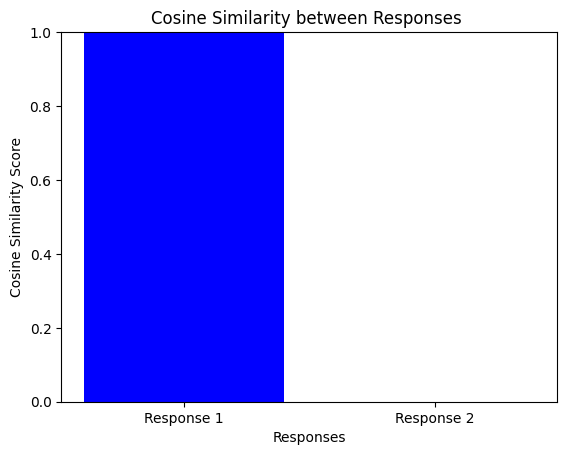

In [15]:
import matplotlib.pyplot as plt

import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

def get_embedding(text, model_name='bert-base-uncased'):
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name)

    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)

    with torch.no_grad():
        outputs = model(**inputs)

    embeddings = outputs.last_hidden_state.mean(1)
    return embeddings.numpy()

def compare_responses(response1, response2, model_name='bert-base-uncased'):
    emb1 = get_embedding(response1, model_name)
    emb2 = get_embedding(response2, model_name)
    similarity = cosine_similarity(emb1, emb2)
    return similarity[0][0]

similarity_score = compare_responses(result1['answer'], result2['answer'])
print("Cosine similarity score:", similarity_score)

# Plotting
labels = ['Response 1', 'Response 2']
scores = [similarity_score, 1 - similarity_score]  # Inverted score for better visualization

plt.bar(labels, scores, color=['blue', 'green'])
plt.title('Cosine Similarity between Responses ')
plt.xlabel('Responses')
plt.ylabel('Cosine Similarity Score')
plt.ylim(0, 1)  # Setting y-axis limit to range from 0 to 1
plt.show()


## MediBot ⚕️👨‍🔬

# Setting Up a Medical Chatbot Interface with Gradio

This script sets up a conversational chatbot interface using Gradio, allowing users to interact with a pre-trained medical chatbot model named "Medical Llama 3-8B".

## Model Setup
- The script initializes the "Medical Llama 3-8B" model for text generation using the Hugging Face Transformers library.
- Configuration options such as temperature, max new tokens, and device mapping are set for generating responses.
- A pipeline is created for text generation based on the configured model.

## Document Loading and Processing
- The script loads a medical document (in PDF format) and splits its text into smaller chunks for efficient processing.

## Embedding Model and Vector Storage Setup
- Sentence embeddings are generated using the "sentence-transformers" library, leveraging the "all-mpnet-base-v2" model.
- A vector store is created using FAISS to index and retrieve embeddings from the processed document chunks.

## Chatbot Response Function
- A function is defined to generate responses from the chatbot based on user inputs.
- The function takes user inputs such as the question, maximum new tokens, temperature, and context length, and returns a response from the chatbot.

## Gradio Interface
- The Gradio interface is configured with input components for user questions and sliders for adjusting parameters.
- The chatbot response function is connected to the interface, enabling users to interact with the chatbot in real-time.
- The interface is titled "MEDICAL Chatbot" and includes a description and an image of a medical robot for visual appeal.

## Running the Interface
- The interface is launched, making the chatbot accessible as a web application. Users can interact with the chatbot by typing questions and adjusting parameters via sliders.


In [16]:
import gradio as gr
from langchain.chains import ConversationalRetrievalChain

def chatbot_response(user_input, max_new_tokens, temperature, context_length):
    # Update the pipeline configuration with user inputs
    pipe.model.config.max_new_tokens = int(max_new_tokens)
    pipe.model.config.temperature = float(temperature)
    pipe.model.config.context_length = int(context_length)

    # Create a conversational retrieval chain with the updated model
    chain = ConversationalRetrievalChain.from_llm(llm, vectorstore.as_retriever(), return_source_documents=True)
    
    # Create a new chat history list, but only return the last answer
    chat_history = []
    
    # Get the result from the chain
    result = chain({"question": user_input, "chat_history": chat_history})
    formatted_answer = result['answer'].replace('\n', '<br>')
    
    # Return only the last answer
    return f"<div style='max-height: 400px; overflow-y: auto;'>{formatted_answer}</div>"

# Setting the Gradio interface
interface = gr.Interface(
    fn=chatbot_response,
    inputs=[
        gr.Textbox(lines=2, placeholder="Type your question here...", label="Your Question", interactive=True),
        gr.Slider(label="Max New Tokens", minimum=1, maximum=2000, value=150, step=1, interactive=True),
        gr.Slider(label="Temperature", minimum=0.1, maximum=1.0, value=0.7, step=0.01, interactive=True),
        gr.Slider(label="Context Length", minimum=100, maximum=4000, value=2000, step=1, interactive=True)
    ],
    outputs=gr.HTML(label="Chatbot Response"),
    title="🩺 MEDICAL Chatbot",
    description="""
    <div style='text-align: center;'>
        <img src='https://cdn.dribbble.com/users/29678/screenshots/2407580/media/34ee4b818fd4ddb3a616c91ccf4d9cfc.png' alt='Medical Bot' width='100'>
        <p>Check the responses from the Medical Llama 3-8B model!</p>
    </div>
    """
)

# Running the interface
interface.launch(share=True)


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://5159ce6077098b533a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
